# Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [132]:
df_data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')

C:\Users\BIMAL\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [133]:
df_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

We need to modify the data,as we see there are a tons of `None` values are **there**.

In [4]:
df_data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [5]:
df_data.isnull().sum().values

array([     0,      0,      0,      0, 172452,      0, 179471,      0,
            0,      0,      0,    421,    434,   4556,   4557,      6,
            0, 126196,  66129,      0,      0,      0,      1, 152680,
       152680,      1,      0,      0,      0,      0, 175377, 175377,
       181263, 181263,      0,      0,  10373,  10373,  42550,    636,
         1559,   1559, 170547, 170547, 171006, 171006, 171574, 170671,
       170863, 170863, 180515, 180515, 180594, 180594, 180665, 180516,
       180544, 180544,      0, 175801, 179678, 181531, 181367, 181671,
       131130,    380, 179736, 181371,      0,  71115,  69489,  66120,
       162608, 162608, 179801, 181075, 181075, 181373, 181558, 181558,
       176852,      0,      0,  20768,  20768, 168564, 168564, 170149,
       170149, 179828, 179828, 179998, 179998, 181618, 181618, 181621,
       181621,  67670,  10313,  64446,  66958,  16311,  64702,  69143,
            0, 117626, 117626, 142702, 123732,    178, 168119, 168174,
      

### As we see there are a lot of `None` values are there, so we take only necessary columns that have lesser than 60% None values

In [6]:
#pleanty number of Null values are there
df = pd.DataFrame(df_data.isnull().sum(),columns=['null-count'])
pd.set_option('display.max_rows',None)
drop_value = df[df['null-count']>=(60*181691)//100]

In [7]:
drop_indexs = drop_value.index

In [8]:
df_data.drop(columns=drop_indexs,inplace=True,axis=1)

In [135]:
df_data.shape 
#have duplicate and nan values

(181691, 135)

In [136]:
# df_data_dup = df_data[df_data.duplicated()]
# df_data_dup.shape
df_data_dup = df_data.drop_duplicates()

In [137]:
df_data_dup.shape #no as such duplicate values are there

(181691, 135)

No **redundent** values are there in the data

## After dropping `Null` value columns,againg we need to drop some columns as they are no use for further analyzing.

In [12]:
pd.set_option('display.max_columns',None)
df_data.head(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,1.0,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1


# Renaming the columns

In [140]:
df_data.rename({'eventid':'event','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                'provstate':'State','city':'City','attacktype1_txt':'AttackType','targtype1':'Target',
               'nkill':'Killed','nwound':'Wounded','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','weapdetail':'Weapon_detail','motive':'Motive'},inplace=True,axis=1)

In [141]:
df_data['dead_injured'] = df_data['Killed'] + df_data['Wounded']

In [142]:
df_data.columns

Index(['event', 'Year', 'Month', 'Day', 'approxdate', 'extended', 'resolution',
       'country', 'Country', 'region',
       ...
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'related', 'dead_injured'],
      dtype='object', length=136)

**Replaing the `numbers` with Month name**

In [159]:
df_data['Month'] = df_data['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['january','february','march','april','may','june','july','august','september','october','november','december'])

In [160]:
df_data.head()

,event,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,State,City,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,Target,Target_type,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,Group,gsubname,gname2,gsubname2,gname3,gsubname3,Motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,Weapon_detail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,dead_injured,month
0,197000000001,1970,july,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0,july
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0,0
2,197001000001,1970,january,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0,january
3,197001000002,1970,january,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ex

Selecting the necessary **columns** for evaluating the `DATA`

In [155]:
df_new_data = df_data[['Year','Month','Day','Country','Region','State','City','success','suicide','AttackType','Target_type','Group',
                      'Weapon_type','Weapon_detail','dead_injured']]

In [156]:
df_new_data.head()

,Year,Month,Day,Country,Region,State,City,success,suicide,AttackType,Target_type,Group,Weapon_type,Weapon_detail,dead_injured
0,1970,july,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,NaN,0.0
2,1970,january,0,Philippines,Southeast Asia,Tarlac,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,NaN,1.0
3,1970,january,0,Greece,Western Europe,Attica,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,Explosive,NaN
4,1970,january,0,Japan,East Asia,Fukouka,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,Incendiary,NaN


# Deadliest Year

C:\Users\BIMAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


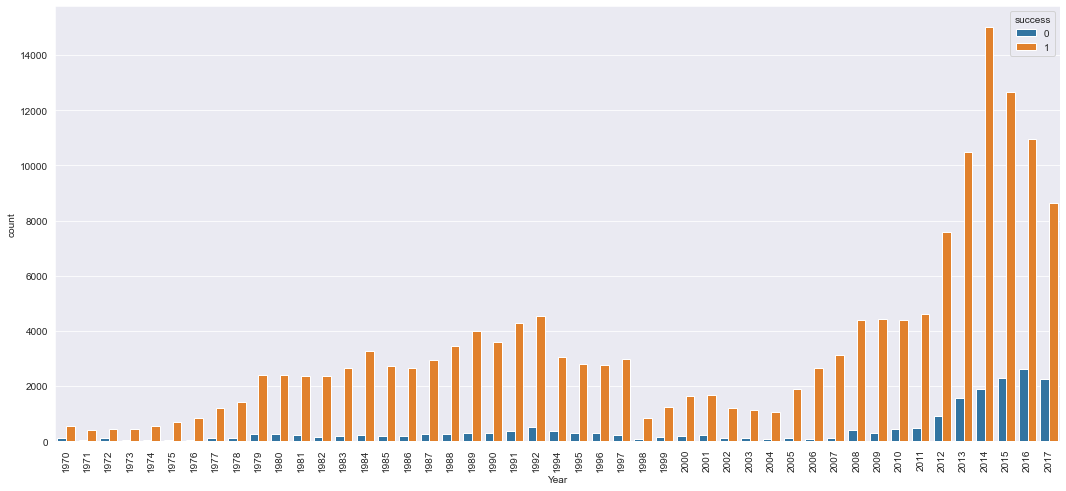

In [157]:
plt.subplots(figsize=(18,8))
sns.countplot('Year',data=df_new_data,hue='success')
plt.xticks(rotation=90)
plt.show()
#most attacks happen in 2012 to 2017

    🔴From 2012 the Success rate of attacks is increasing year by year

# Most affected month

C:\Users\BIMAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


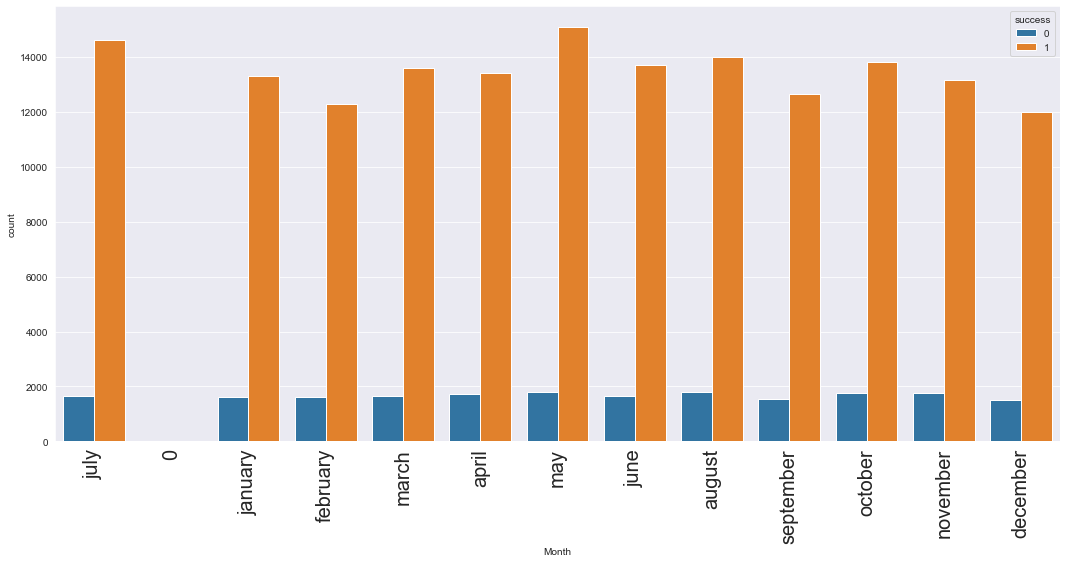

In [158]:
plt.subplots(figsize=(18,8))
sns.countplot('Month',data=df_new_data,hue='success')
plt.xticks(rotation=90,fontsize=20)
plt.show()

The attack rate is more likely equal on every month

# Most affected country

C:\Users\BIMAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


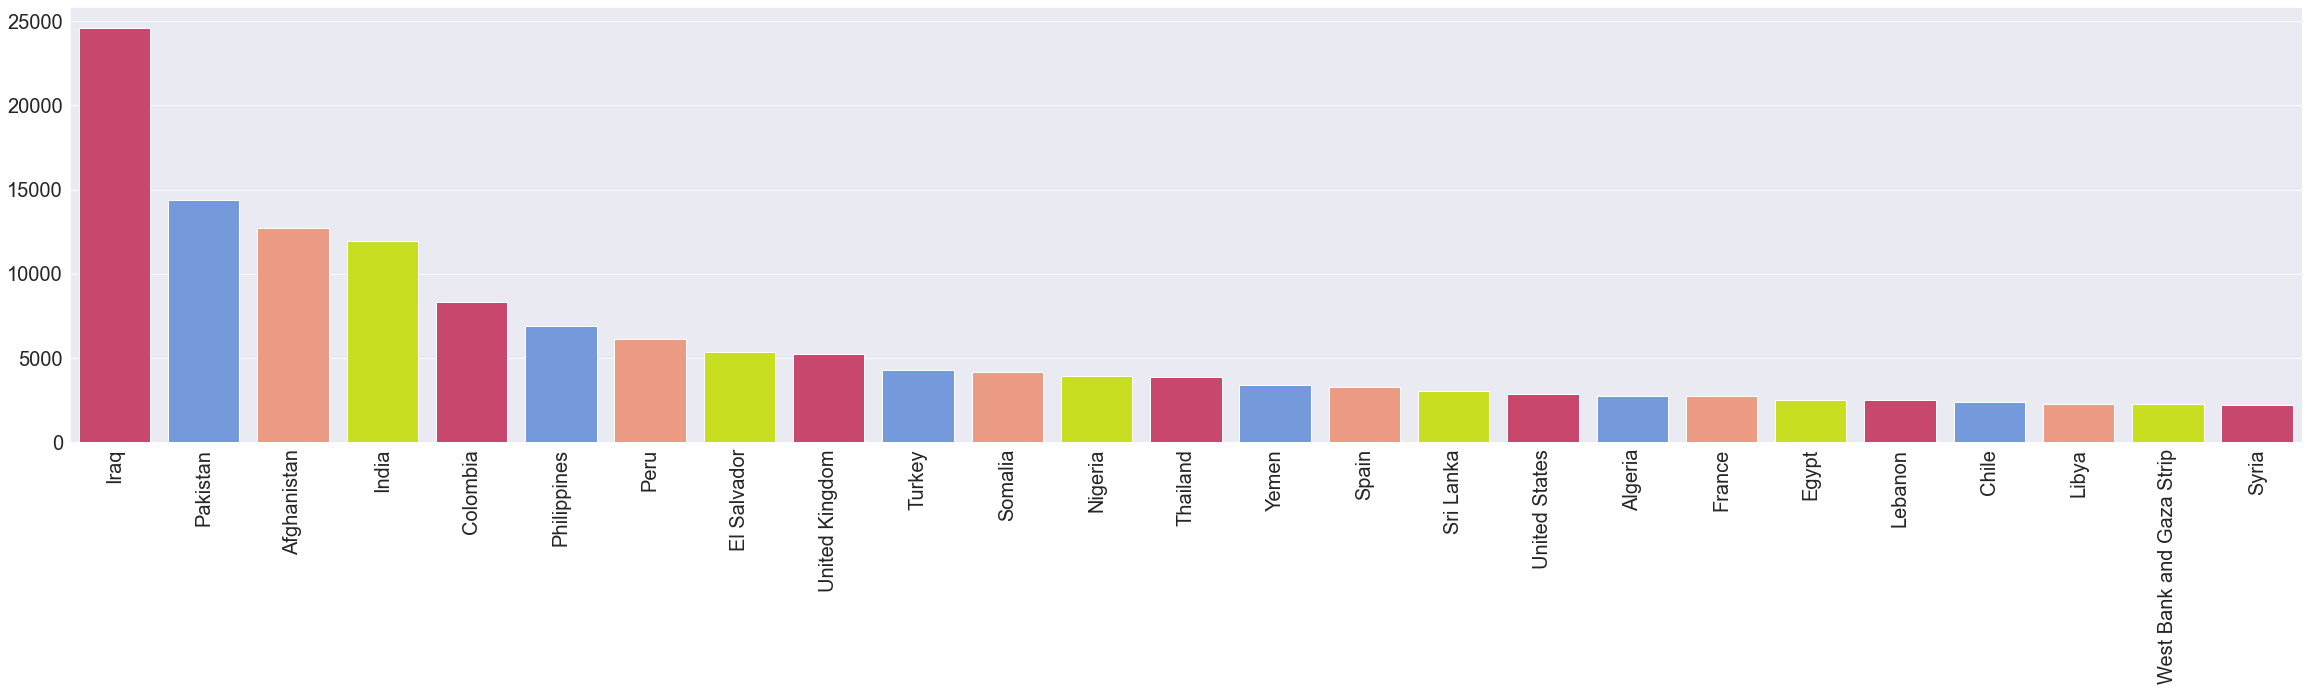

In [22]:
plt.subplots(figsize=(40,8))
sns.barplot(df_new_data['Country'].value_counts()[:25].index,df_new_data['Country'].value_counts()[:25].values,palette=["#de3163","#6495ed","#fc9272", "#DFFF00"])
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

**Iraq , Pakistan , Afghanisthan , India , Colombia** the most affected country 

# More deadliest Year

In [23]:
val = df_new_data.groupby(['Year'])['dead_injured'].sum().reset_index()
val.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
Year,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
dead_injured,367.0,119.0,602.0,621.0,1122.0,781.0,1158.0,874.0,2664.0,4378.0,7532.0,8106.0,7512.0,11271.0,15462.0,12004.0,10524.0,12141.0,14014.0,13617.0,13261.0,15961.0,19610.0,14663.0,20233.0,17383.0,19468.0,10754.0,7819.0,8890.0,29662.0,10356.0,10126.0,16911.0,18258.0,23740.0,33728.0,27594.0,27210.0,23651.0,22566.0,39381.0,57679.0,68853.0,72833.0,69225.0,48208.0


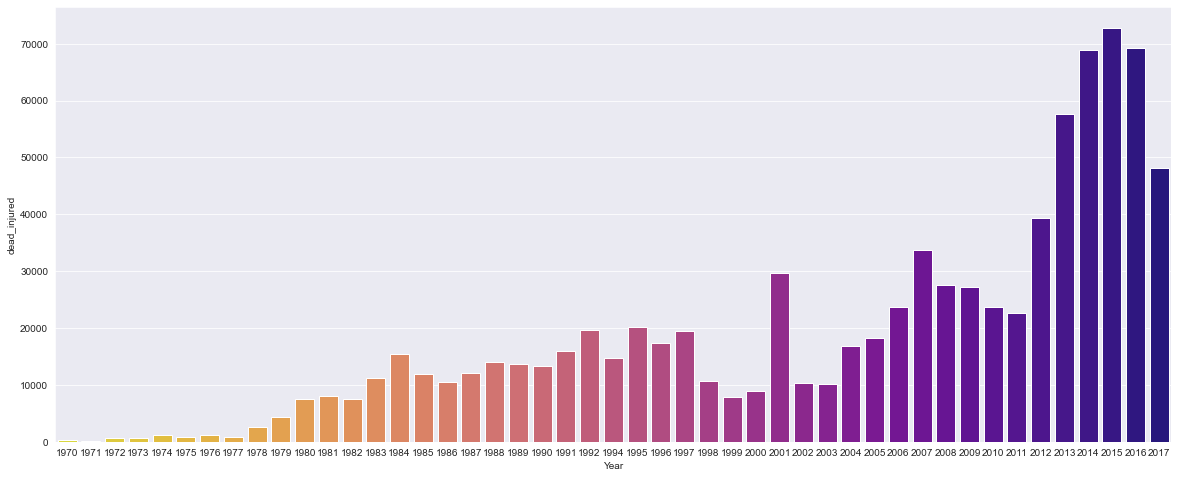

In [24]:
plt.figure(figsize=(20,8))
sns.barplot(x = val['Year'],y = val['dead_injured'],data=val,palette="plasma_r")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

From **2012** onwards the terror attacks has been increasing in a rapid pace,the most deadliest is to be **2015**

# Region

In [118]:
region = df_new_data.groupby(['Region'])['dead_injured'].sum().reset_index().sort_values(by='dead_injured')
region.transpose()

,0,2,3,4,11,6,1,9,7,10,8,5
Region,Australasia & Oceania,Central Asia,East Asia,Eastern Europe,Western Europe,North America,Central America & Caribbean,Southeast Asia,South America,Sub-Saharan Africa,South Asia,Middle East & North Africa
dead_injured,409,2969,10003,18239,22778,26398,34530,40841,43562,108990,234366,329807


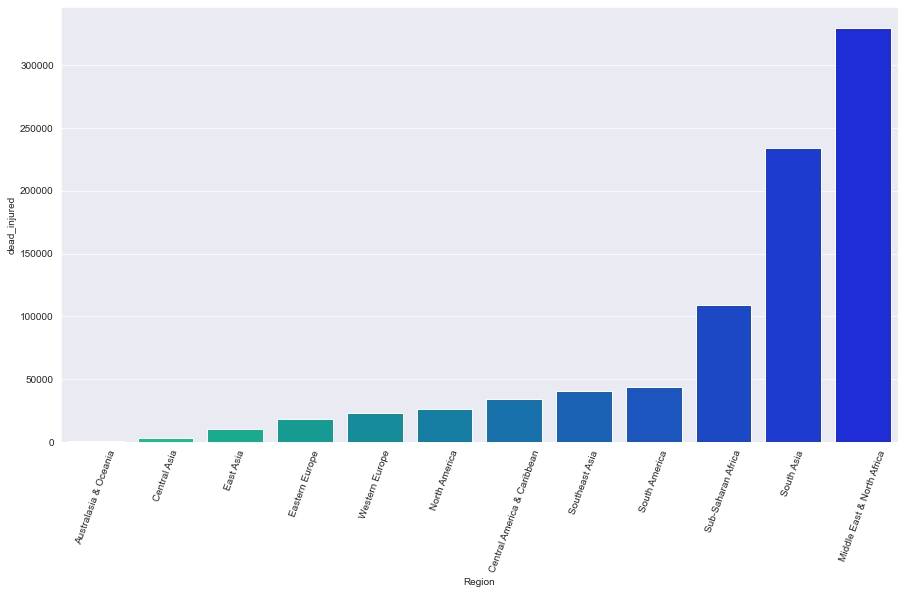

In [123]:
plt.figure(figsize=(15,8))
sns.barplot(x = region['Region'],y = region['dead_injured'],data=region,palette="winter_r")
plt.xticks(fontsize = 10,rotation=70)
plt.yticks(fontsize = 10)
plt.show()

The **Middled East & North Africa and South Africa** region peoples face the most number of attack were face.

# Most Affected Country

In [27]:
country = df_new_data.groupby(['Country'])['dead_injured'].sum().reset_index()
dead_count = country.sort_values(by='dead_injured',ascending=False)[country['dead_injured']>1000]

<ipython-input-27-e99229cc4b45>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dead_count = country.sort_values(by='dead_injured',ascending=False)[country['dead_injured']>1000]


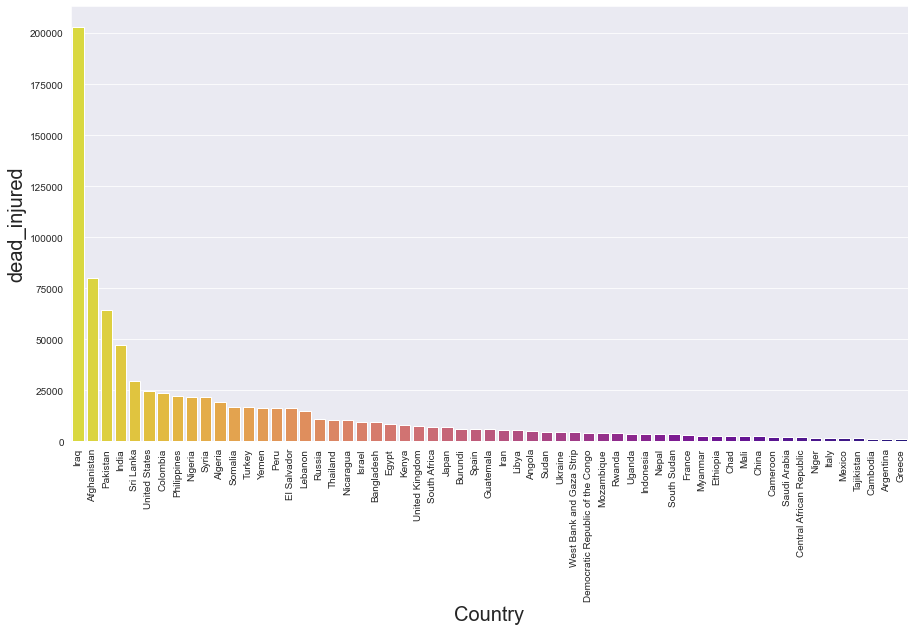

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Country',y = 'dead_injured',data=dead_count,palette="plasma_r")
plt.xticks(fontsize = 10,rotation = 90)
plt.yticks(fontsize = 10)
plt.xlabel('Country',fontsize = 20)
plt.ylabel('dead_injured',fontsize = 20)
plt.show()

<span style="color:red"><b>Iraq</b></span> is the most affected country and many peoples were suffered.

# Most Affected State

In [36]:
count = df_new_data.groupby(['State'])['dead_injured'].sum().reset_index()
state_count = count.sort_values(by='dead_injured',ascending=False)[count['dead_injured']>1000]
state_count.transpose()

<ipython-input-36-c8e00d6603dc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  state_count = count.sort_values(by='dead_injured',ascending=False)[count['dead_injured']>1000]


,211,1762,2192,675,2622,56,1749,2058,207,1076,227,2325,786,1237,716,1258,355,2741,1120,232,1818,965,1153,288,77,1815,122,2570,167,1699,1713,637,482,841,1804,1822,194,82,821,1315,659,1171,1052,1088,1472,747,686,781,1396,968,1234,1482,777,98,2727,2632,2220,299,984,2476,23,343,1792,531,653,2522,1776,1921,550,1314,1047,772,1716,1786,336,1946,525,2221,2405,1245,824,261,1479,1920,516,1510,1415,2792,2806,212,676,13,146,2650,226,2764,2728,2087,1324,1011,2717,2822,1517,399,58,1665,2373,278,1700,625,1798,1157,1693,2523,1787,1089,928,471,618,2639,1592,2481,933,22,649,2330,1999,1236,316,2720,1081,260,851,2635,1348,2217,1838,112,1437,1110,1761,257,117,1005,1440,1790,929,664,902,210,1649,2621,1125,1235,208,2446,397,1525
State,Baghdad,Nineveh,Saladin,Diyala,Unknown,Al Anbar,New York,Punjab,Babil,Jammu and Kashmir,Balochistan,Sindh,Federally Administered Tribal Areas,Khyber Pakhtunkhwa,Eastern,Kirkuk,Borno,Western,Kabul,Banaadir,Northern,Helmand,Kandahar,Beirut,Aleppo,North-West Frontier Province,Antioquia,Tokyo,Assam,Nairobi,Nangarhar,Damascus,Central,Ghazni,North Sinai,Northern Ireland,Ayacucho,Algiers,Gauteng,Kunduz,Dhaka,Karbala,Istanbul,Jerusalem,Madrid,England,Donetsk,Faryab,Lima,Herat,Khost,Maharashtra,Farah,Amanat Al Asimah,West Bank,Uruzgan,San Salvador,Benghazi,Homs,Taizz,Adan,Bogota,North Kivu,Chhattisgarh,Delhi,Tehran,North,Paktika,Chittagong,Kunar,Islamabad Capital Territory,Extreme-North,Narathiwat,North Central,Blida,Pattani,Chechnya (Republic),San Vicente,Southern,Kigali,Gaza Strip,Basra,Maguindanao,Paktia,Chalatenango,Manipur,Logar,Yobe,Zabul,Baghlan,Diyarbakir,Abyan,Arbil,Valle del Cauca,Balkh,Yala,West Bengal,Quiche,KwaZulu-Natal,Ile-de-France,Wardak,Zamboanga del Sur,Maputo,Bujumbura Mairie,Al Hasakah,Mount Lebanon,South,Bay,Najaf,Dagestan,North Ossetia-Alania (Republic),Kano,N'Djamena,Tel Aviv,North Cotabato,Jharkhand,Hadramawt,Cauca,Cuscatlan,Uttar Pradesh,Metropolitian Manila,Takhar,Hakkari,Adamawa,Davao del Sur,Sirnak,Plateau,Khuzestan,Bihar,Wasit,Jawzjan,Basque Country,Gisenyi,Usulutan,Laghman,San Miguel,Nueva Segovia,Andhra Pradesh,Lower Juba,Junin,Nimroz,Basilan,Ankara,Idlib,Lower Shebelle,North Eastern,Haifa,Diffa,Guatemala,Badghis,Morazan,Unity,Kaduna,Khulna,Badakhshan,Sulu,Buenos Aires,Mardin
dead_injured,77170,23986,22814,21432,21276,20389,19617,14559,12750,12268,12033,11271,11103,10910,10861,10347,9489,9151,9139,8654,8490,7747,7477,7253,7179,6534,6223,6069,5831,5519,5473,5391,4855,4522,4419,4034,4032,3810,3781,3777,3761,3563,3412,3293,3288,3276,3165,3137,3013,3006,3005,3003,2988,2922,2872,2777,2737,2569,2564,2560,2551,2509,2421,2411,2396,2385,2295,2289,2241,2229,2194,2174,2124,2120,2107,2067,2032,2012,1957,1945,1889,1886,1845,1834,1822,1807,1804,1755,1743,1737,1729,1721,1714,1696,1675,1664,1640,1635,1635,1631,1619,1618,1601,1591,1571,1560,1552,1537,1522,1511,1498,1493,1482,1458,1457,1455,1454,1364,1362,1358,1358,1357,1345,1333,1330,1325,1311,1300,1296,1286,1276,1271,1264,1248,1236,1229,1222,1216,1180,1168,1160,1142,1137,1137,1130,1111,1096,1090,1090,1084,1081,1065,1061,1048,1047,1025,1010,1009


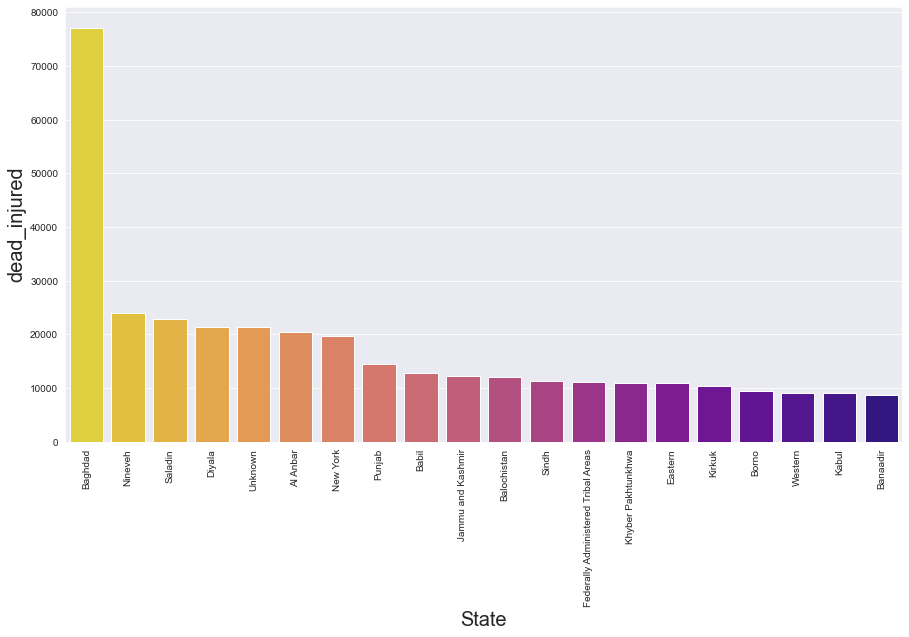

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'State',y = 'dead_injured',data=state_count[:20],palette="plasma_r")
plt.xticks(fontsize = 10,rotation = 90)
plt.yticks(fontsize = 10)
plt.xlabel('State',fontsize = 20)
plt.ylabel('dead_injured',fontsize = 20)
plt.show()

<span style="color:red">BAGHDAD</span> is the most attack location including all state.

# Most causality in Cities

In [51]:
city = df_new_data.groupby(['City'])['dead_injured'].sum().reset_index()
city_count = city.sort_values(by='dead_injured',ascending=False)[city['dead_injured']>1000]
city_count

<ipython-input-51-1fc36dc910d5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_count = city.sort_values(by='dead_injured',ascending=False)[city['dead_injured']>1000]


,City,dead_injured
3042,Baghdad,76897.0
34517,Unknown,31357.0
24144,New York City,19618.0
22828,Mosul,12360.0
16058,Karachi,9201.0
22519,Mogadishu,8603.0
15377,Kabul,8406.0
4417,Beirut,7210.0
17457,Kirkuk,6499.0
8037,Colombo,5852.0


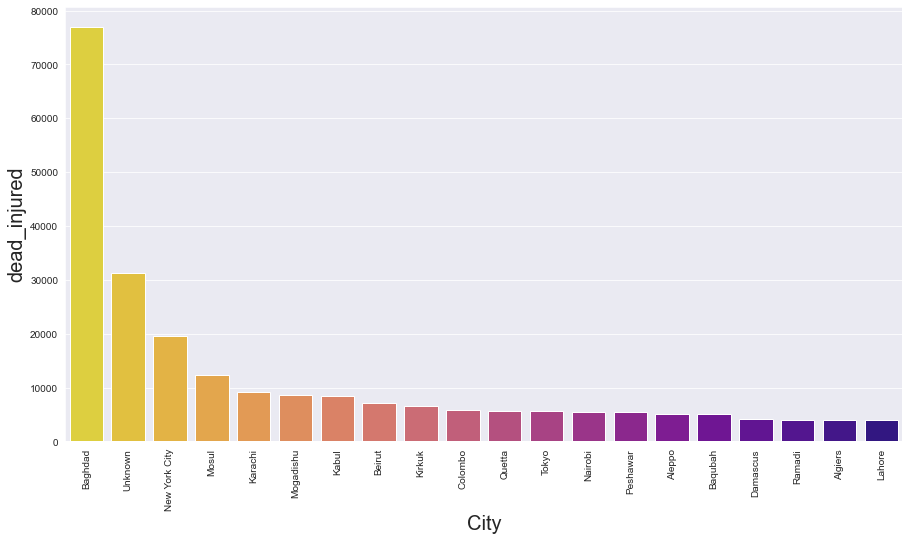

In [52]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'City',y = 'dead_injured',data=city_count[:20],palette="plasma_r")
plt.xticks(fontsize = 10,rotation = 90)
plt.yticks(fontsize = 10)
plt.xlabel('City',fontsize = 20)
plt.ylabel('dead_injured',fontsize = 20)
plt.show()

<span style="color:red">Baghdad</span> is the most affected city.

# Weapon Used 

In [70]:
weapon = df_new_data.groupby(['Weapon_type'])['dead_injured'].sum().reset_index()

sort_weapon = weapon.sort_values(by='dead_injured')

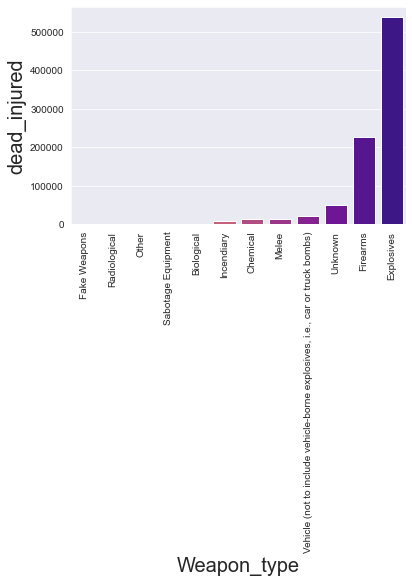

In [74]:
sns.barplot(x='Weapon_type',y='dead_injured',data=sort_weapon,palette="plasma_r")
plt.xlabel('Weapon_type',fontsize = 20)
plt.ylabel('dead_injured',fontsize = 20)
plt.xticks(fontsize = 10,rotation = 90)
plt.yticks(fontsize = 10)
plt.show()

<span style="color:red">Explosives and firearms </span>are the most used weapons in attacks

# Attack_type

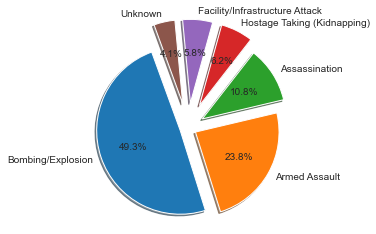

In [110]:
fig, ax = plt.subplots()
label1=df_new_data['AttackType'].value_counts()[:6].index
size=df_new_data['AttackType'].value_counts()[:6].values
explode = (0.1, 0.1, 0.2, 0.3,0.3,0.3) 
ax.pie(size, explode=explode, labels=label1, autopct='%1.1f%%',
        shadow=True,startangle=110)
ax.axis('equal')  
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<span style="color:red">Bombing and Armed Assault </span> is mostly use.

# Target Type

C:\Users\BIMAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


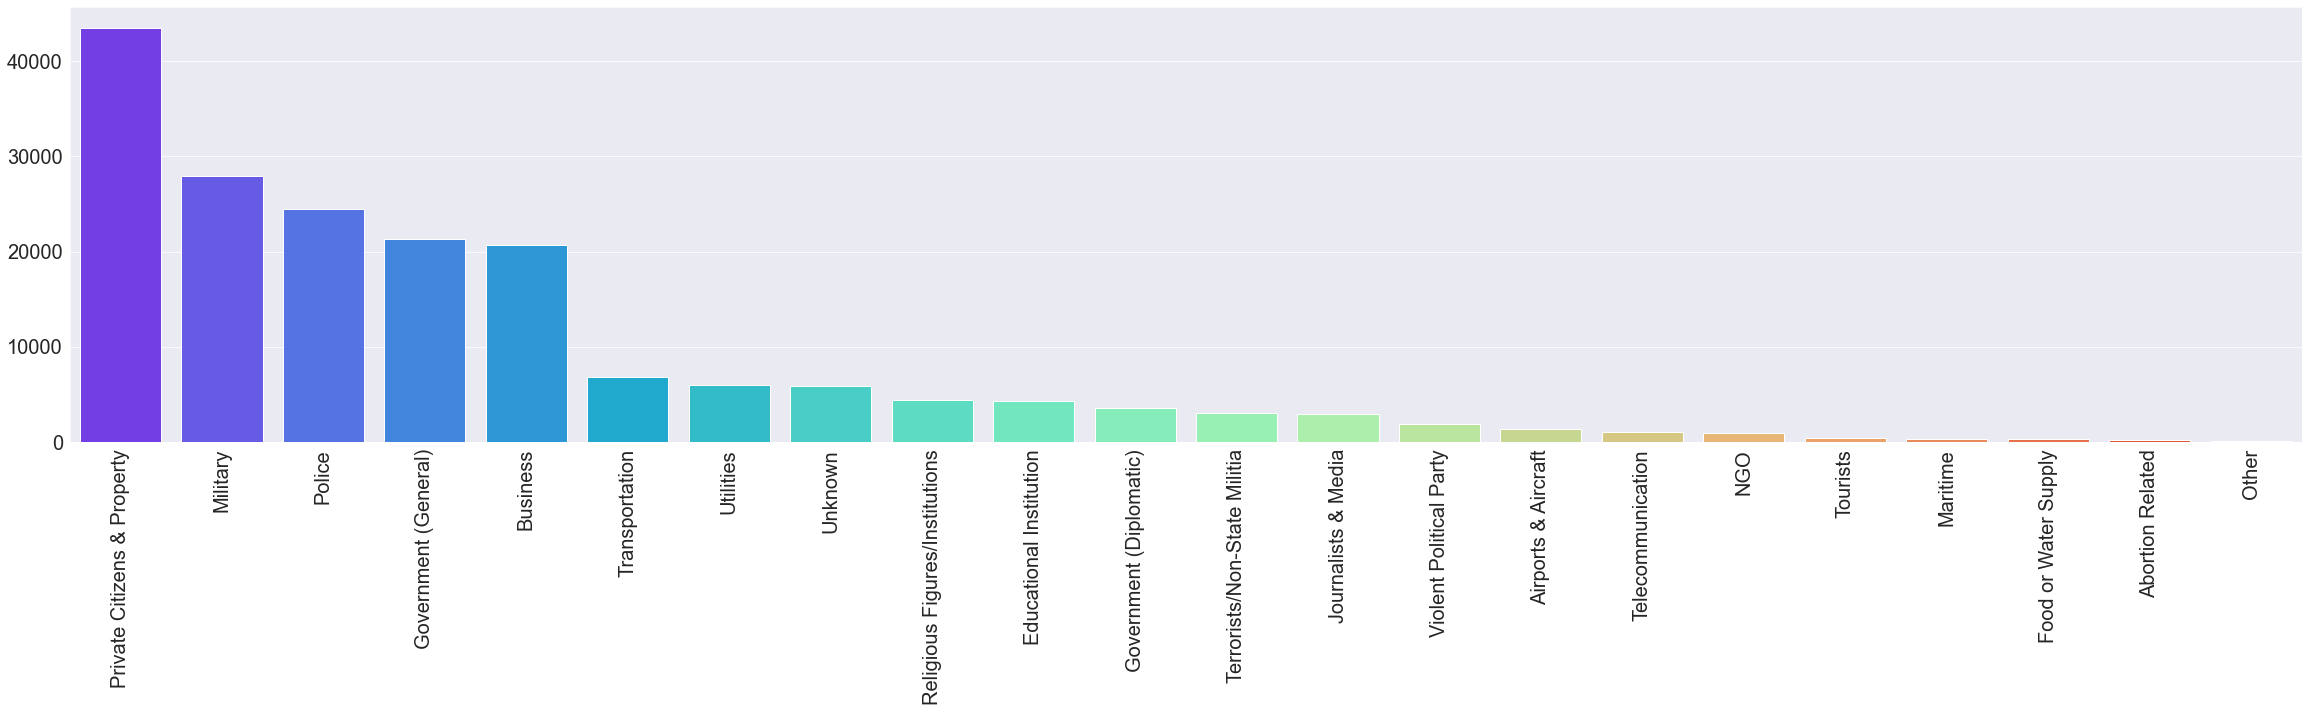

In [114]:
plt.subplots(figsize=(40,8))
sns.barplot(df_new_data['Target_type'].value_counts()[:25].index,df_new_data['Target_type'].value_counts()[:25].values,palette='rainbow')
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

<span style="color:blue">Private,Military,police,goverment </span> sector were targeted the most number of times.

# Deadliest Groups

C:\Users\BIMAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


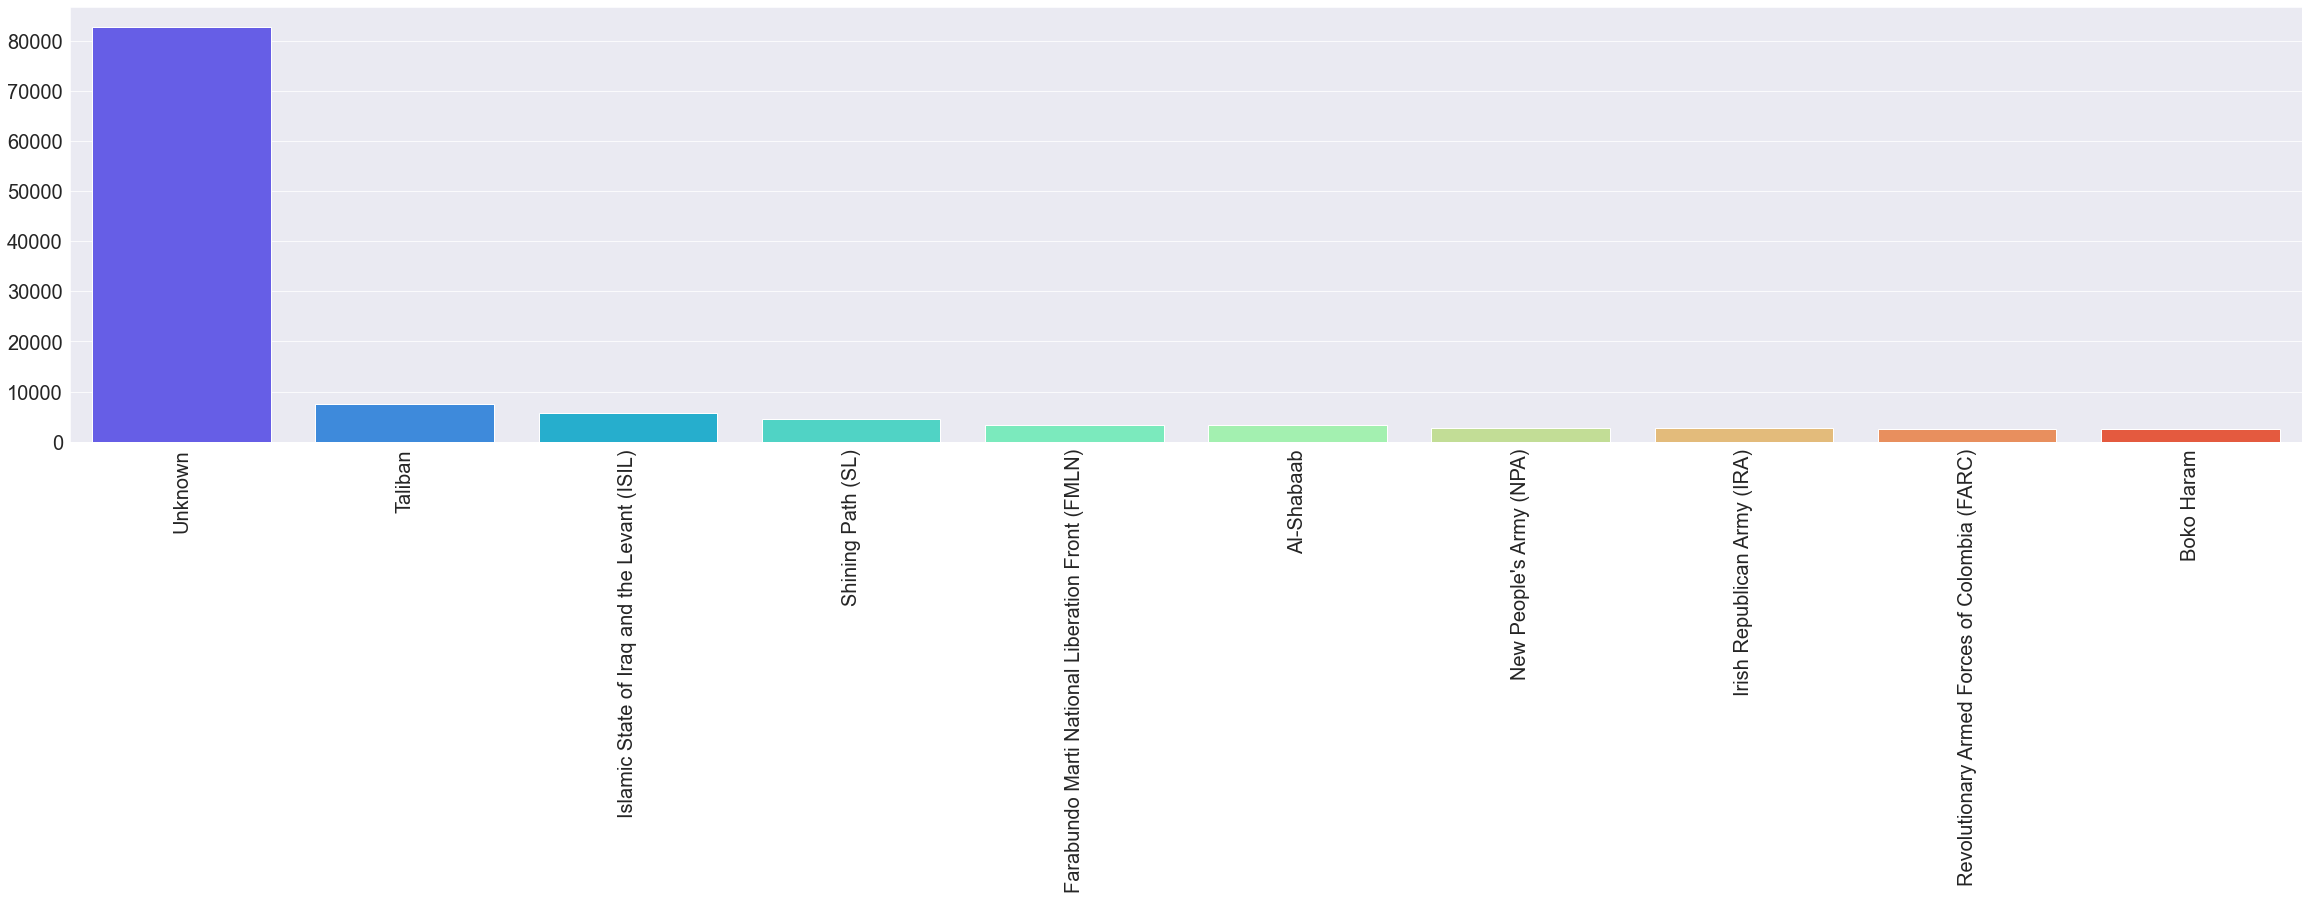

In [126]:
plt.subplots(figsize=(40,8))
sns.barplot(df_new_data['Group'].value_counts()[:10].index,df_new_data['Group'].value_counts()[:10].values,palette='rainbow')
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Weapon detail

C:\Users\BIMAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


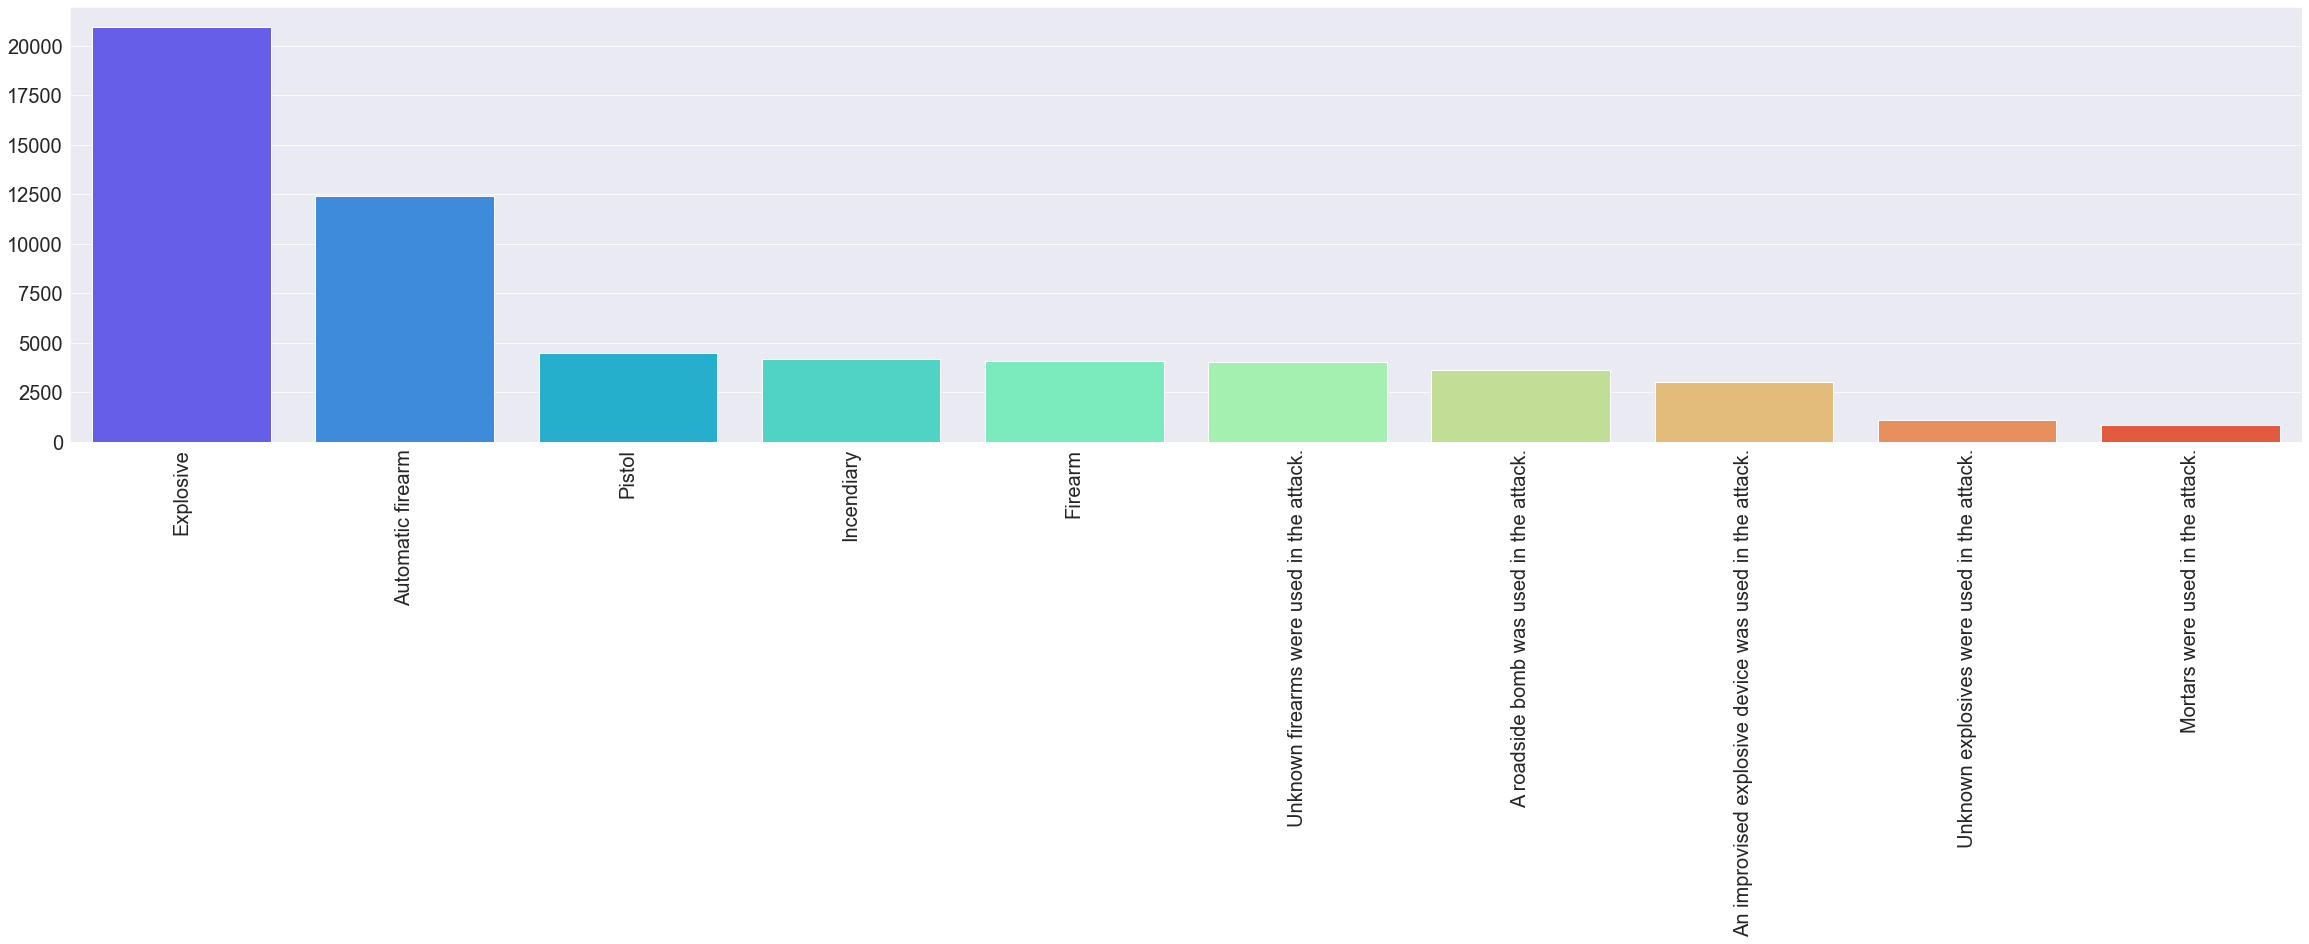

In [131]:
plt.subplots(figsize=(40,8))
sns.barplot(df_new_data['Weapon_detail'].value_counts()[:10].index,df_new_data['Weapon_detail'].value_counts()[:10].values,palette='rainbow')
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

**`Explosive`** medium is mostly use for terror attck.

#                                    💥           Conclusion           💥

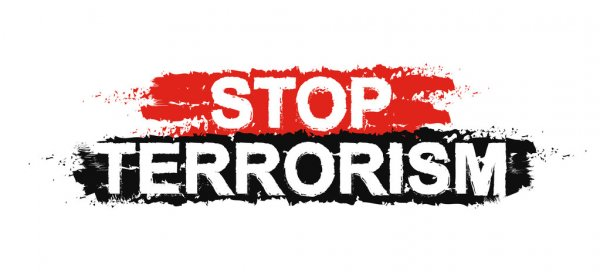